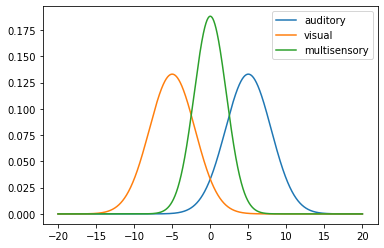

In [1]:
from skneuromsi.alais_burr2004 import AlaisBurr2004
import matplotlib.pyplot as plt

model = AlaisBurr2004()
out = model.run(visual_location=-5, auditory_location=5)

for k in out: plt.plot(model.posible_locations,out[k], label = k);
plt.legend();

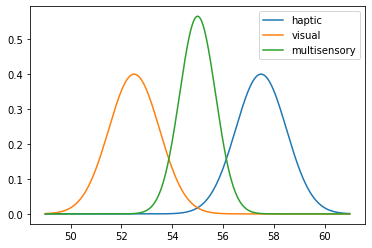

In [2]:
from skneuromsi.ernst_banks2002 import ErnstBanks2002

model = ErnstBanks2002()
out = model.run(visual_height = 52.5, haptic_height = 57.5)

for k in out: plt.plot(model.posible_heights,out[k], label = k);
plt.legend();

In [3]:
from skneuromsi.kording2007 import Kording2007

model = Kording2007()
model.run()

(array([-0.16499372, -0.06552035]), array([-0.16499372, -0.06552035]))